# Sales Supermarket Analysis

## Business Research

Pertumbuhan supermarket di sebagian besar kota berpenduduk padat semakin meningkat dan persaingan pasar juga tinggi. Dataset ini merupakan salah satu data historis penjualan perusahaan supermarket yang tercatat di 3 cabang berbeda selama 3 bulan. Metode analisis data prediktif mudah diterapkan dengan dataset ini. Dengan Tujuannya adalah dataset ini dapat digunakan untuk tujuan analisis data prediktif dengan data historis.

Invoice ID Nomor identifikasi faktur slip penjualan yang dibuat oleh komputer.

Branch: Cabang dari supercenter (tersedia 3 cabang yang diidentifikasi dengan A, B, dan C).

City: Lokasi supercenter.

Customer type: Jenis pelanggan, dicatat oleh Anggota untuk pelanggan yang menggunakan kartu anggota dan Normal untuk pelanggan yang tidak memiliki kartu anggota.

Gender: Jenis kelamin pelanggan.

Product Line: Kelompok kategorisasi barang umum - Aksesori elektronik, Aksesori fashion, Makanan dan minuman, Kesehatan dan kecantikan, Rumah dan gaya hidup, Olahraga dan perjalanan.

Unit Price: Harga setiap produk dalam $.

Quantity: Jumlah produk yang dibeli oleh pelanggan.

Tax: Biaya pajak 5% untuk pembelian pelanggan.

Total: Total harga termasuk pajak.

Date: Tanggal pembelian (Catatan tersedia dari Januari 2019 hingga Maret 2019).

Time: Waktu pembelian (10:00 hingga 21:00).

Payment: Pembayaran yang digunakan oleh pelanggan untuk pembelian (tersedia 3 metode - Tunai, kartu kredit dan Ewallet).

cogs: Harga pokok penjualan.

Gross margin percentage: Persentase margin kotor.

Gross income: Pendapatan kotor.

Rating: Peringkat stratifikasi pelanggan berdasarkan pengalaman berbelanja mereka secara keseluruhan (dalam skala 1 sampai 10).

Translated with DeepL.com (free version)

## Import Data & Library

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('D:\ikppwp\Lamaran Kerja\Project Iseng\supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Preperation and Cleaning Data

In [167]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.to_csv('supermarket_sales_new.csv')

In [168]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Year'].astype('object')
df['Month'] = df['Month'].astype('object')
df.drop(['Invoice ID', 'Time', 'gross margin percentage'], axis=1, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Year,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,2019,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,2019,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,2019,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,2019,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,2019,2


In [169]:
df.describe(include='all')

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Year,Month
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.00000,1000.0,1000.0
unique,3,3,2,2,6,NaN,NaN,NaN,NaN,89,3,NaN,NaN,NaN,1.0,3.0
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2019-02-07 00:00:00,Ewallet,NaN,NaN,NaN,2019.0,1.0
freq,340,340,501,501,178,NaN,NaN,NaN,NaN,20,345,NaN,NaN,NaN,1000.0,352.0
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,307.58738,15.379369,6.97270,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,11.708825,1.71858,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,10.17000,0.508500,4.00000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,118.49750,5.924875,5.50000,NaN,NaN


In [170]:
df.isna().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Payment          0
cogs             0
gross income     0
Rating           0
Year             0
Month            0
dtype: int64

Ditunjukkan bahwa tidak ada data yang missing values sehingga data sudah bersih dari missing values.

In [171]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Year,Month


Ditunjukkan bahwa tidak ada data yang duplicated sehingga data yang digunakan sudah bisa dilakukan untuk pemodelan dan analysis.

In [172]:
numeric_col = df.select_dtypes(['int','float']).columns
numeric_col

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income',
       'Rating'],
      dtype='object')

<Figure size 2000x2000 with 0 Axes>

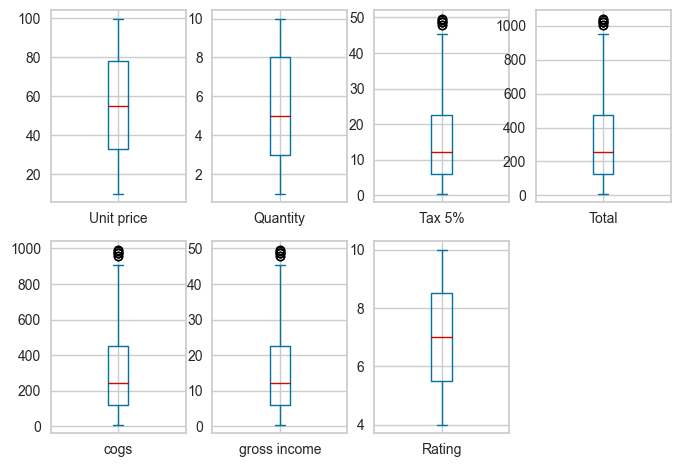

In [173]:
plt.figure(figsize=(20,20))
df[numeric_col].plot(subplots=True, kind='box', layout=(2,4))
plt.show()

Hal ini dapat diantisipasi dengan menggunakan robust scaller daripada harus dihapuskan beberapa data karena dapat membuat analysis menjadi bias.

<Figure size 1500x1500 with 0 Axes>

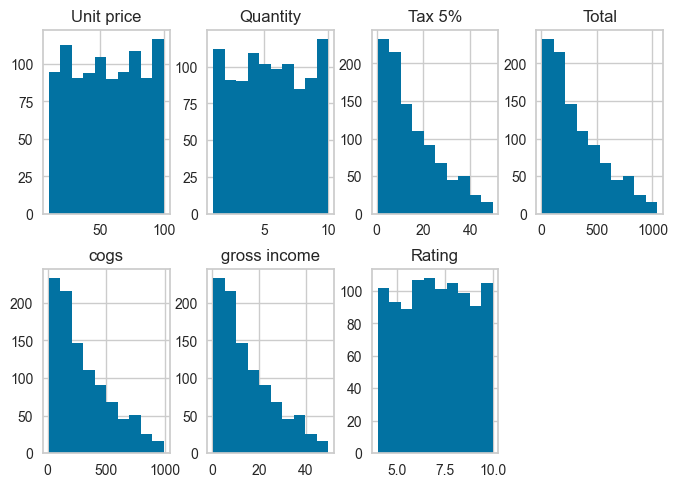

In [174]:
plt.figure(figsize=(15,15))
df.hist( layout=(2,4), column = numeric_col)
plt.show()

Distribusi dari data yang dimiliki tidak keseluruhan berdistribusi normal sehingga terindikasi non linear sehingga saat pemodelan dapat menggunakan metode yang non linear.

## Insight and Analysis Data

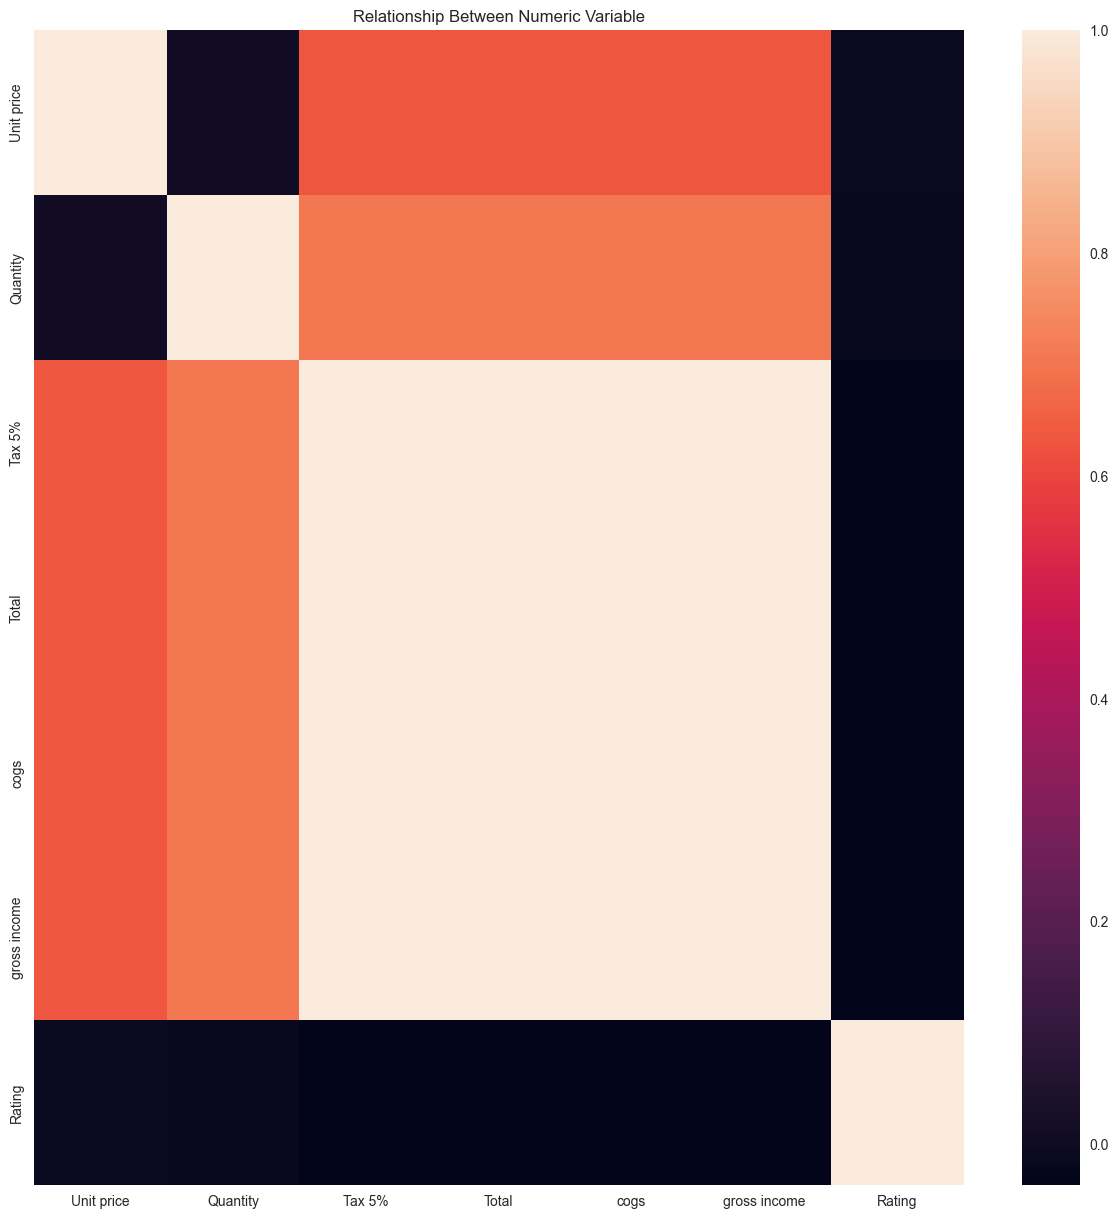

In [175]:
corr = df[numeric_col].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr)
plt.title('Relationship Between Numeric Variable')
plt.show()

In [176]:
corr.style.background_gradient(cmap='coolwarm')

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


Terdepat hubungannya yang signifikan pada beberapa feature, ini menurut penulis diasumsikan karena feature tersebut menjadi bagian perhitungan pada feature yang lainnya.

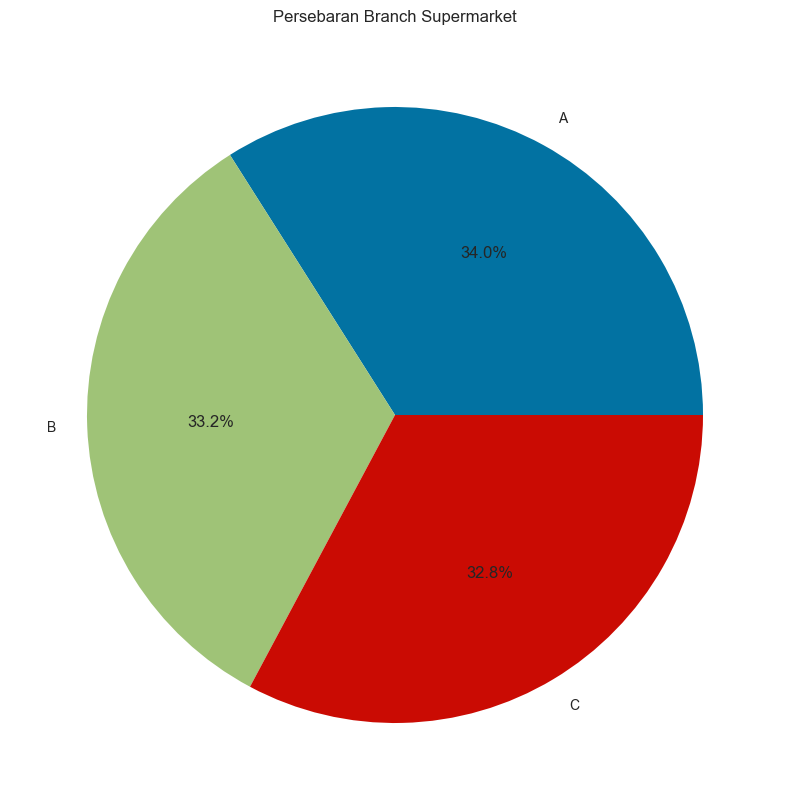

In [177]:
group_df = df.groupby('Branch').count().reset_index()
plt.figure(figsize=(10,10))
plt.pie(group_df['cogs'], labels=('A', 'B', 'C'), autopct='%1.1f%%')
plt.title('Persebaran Branch Supermarket')
plt.show()

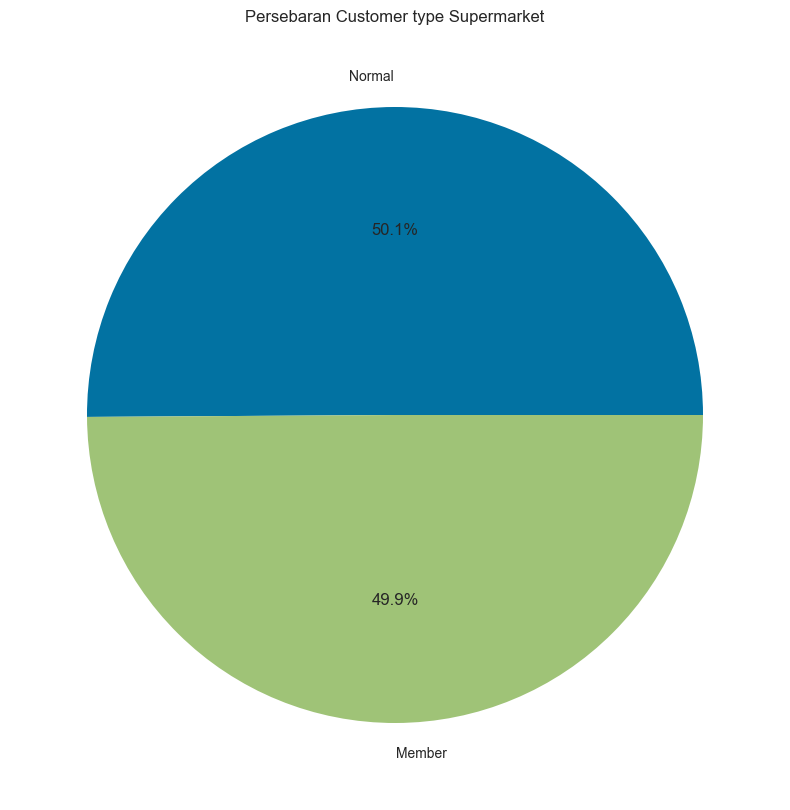

In [178]:
group_df = df.groupby('Customer type').count().reset_index()
plt.figure(figsize=(10,10))
plt.pie(group_df['cogs'], labels=('Normal', 'Member'), autopct='%1.1f%%')
plt.title('Persebaran Customer type Supermarket')
plt.show()

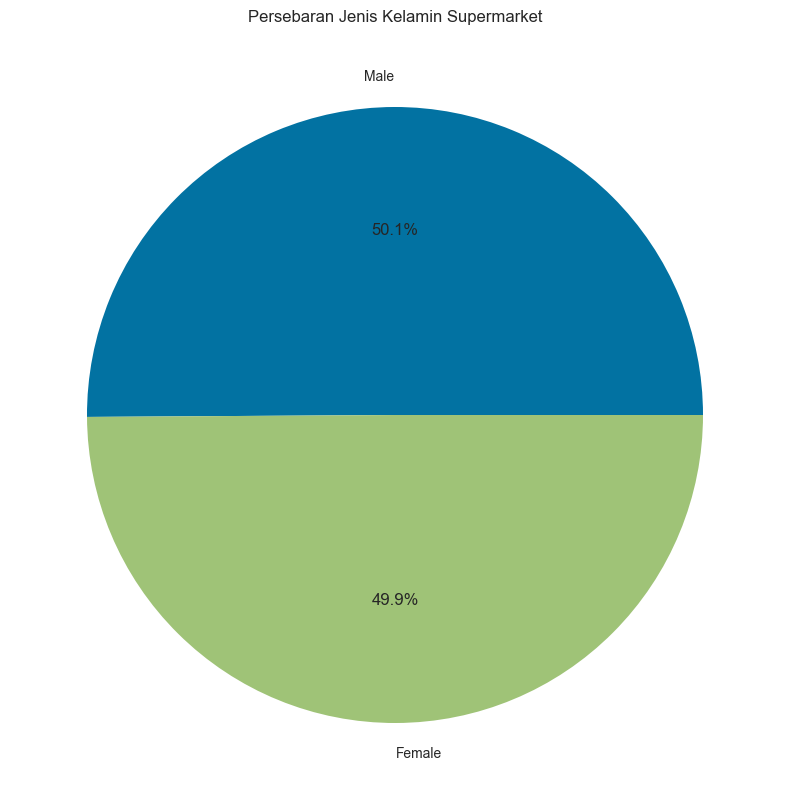

In [179]:
group_df = df.groupby('Gender').count().reset_index()
plt.figure(figsize=(10,10))
plt.pie(group_df['cogs'], labels=('Male', 'Female'), autopct='%1.1f%%')
plt.title('Persebaran Jenis Kelamin Supermarket')
plt.show()

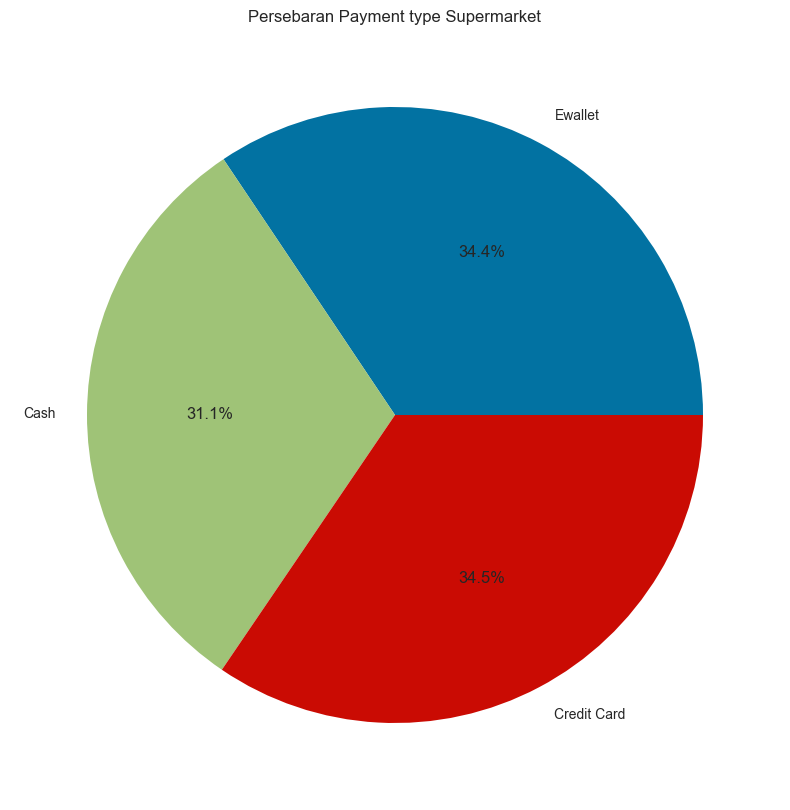

In [180]:
group_df = df.groupby('Payment').count().reset_index()
plt.figure(figsize=(10,10))
plt.pie(group_df['cogs'], labels=('Ewallet', 'Cash', 'Credit Card'), autopct='%1.1f%%')
plt.title('Persebaran Payment type Supermarket')
plt.show()

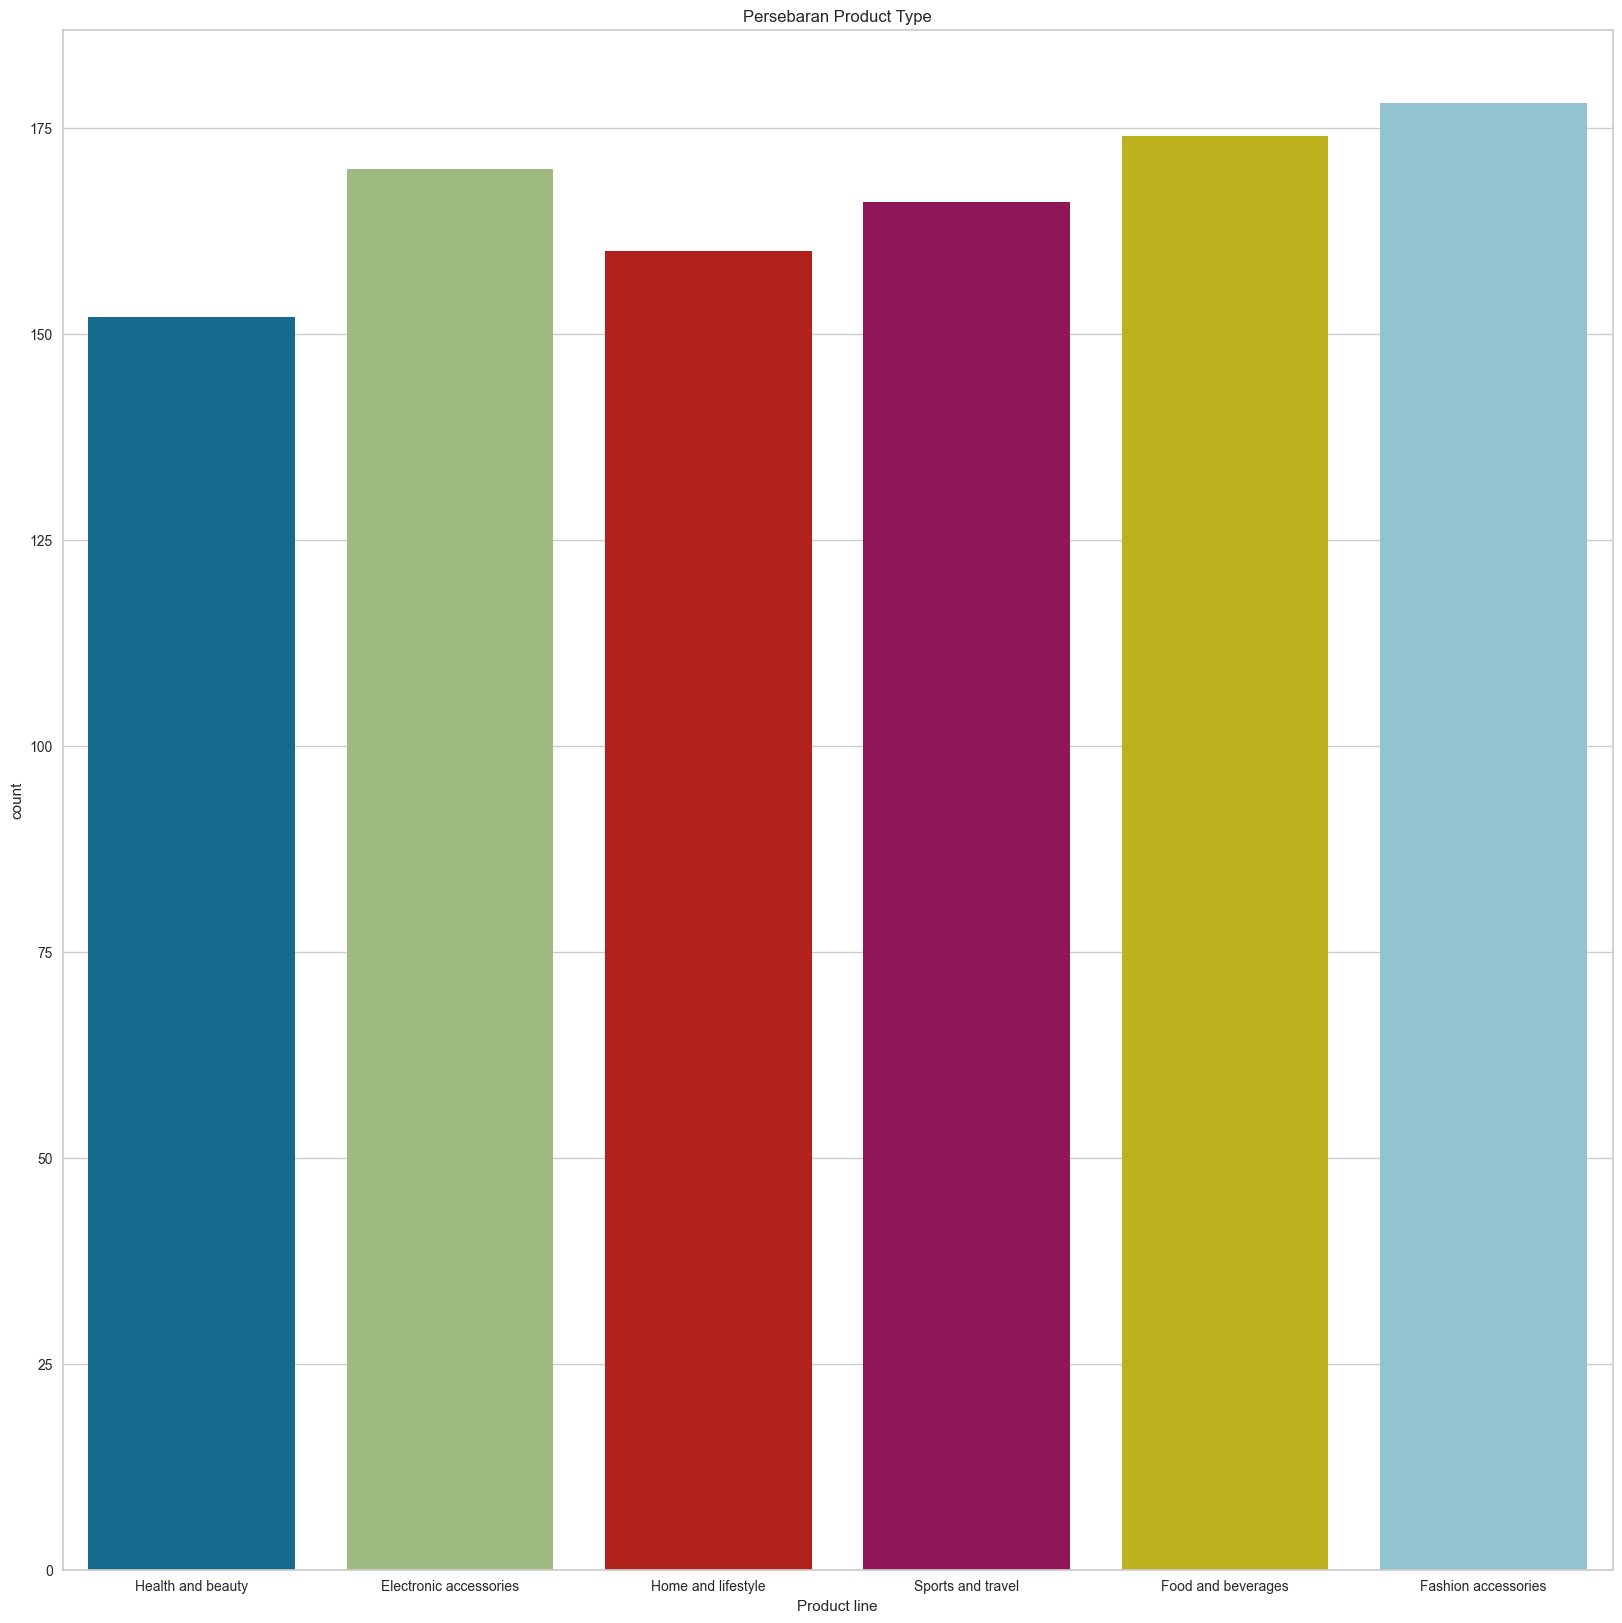

In [181]:
plt.figure(figsize=(20,20))
sns.countplot(data=df, x='Product line')
plt.title('Persebaran Product Type')
plt.show()

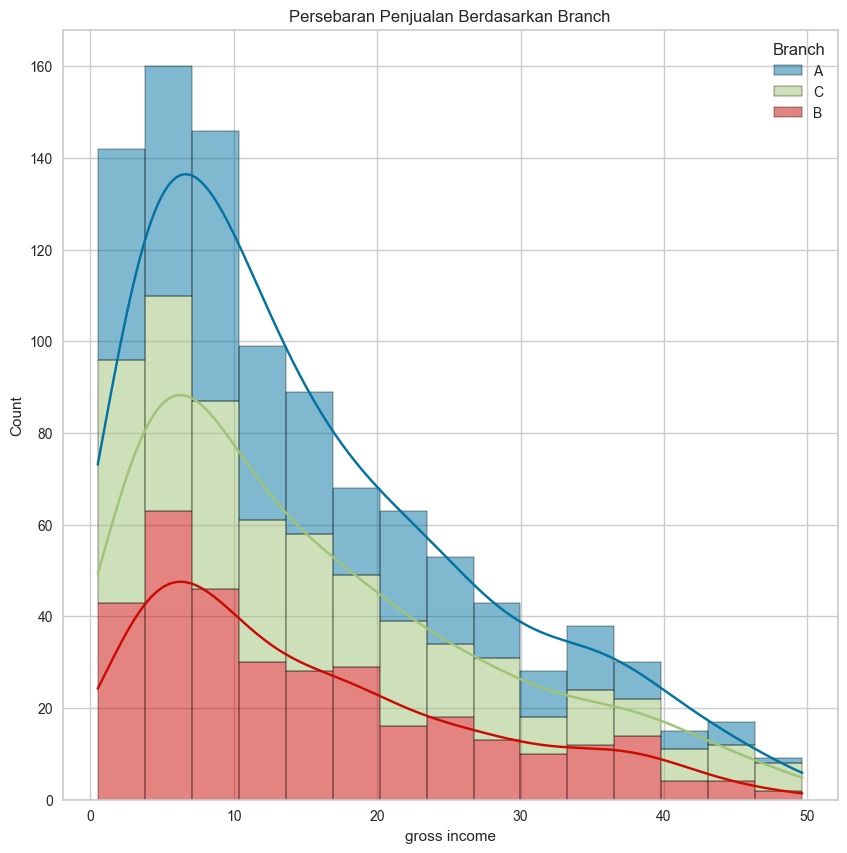

In [182]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='gross income', hue='Branch', multiple='stack', kde=True)
plt.title('Persebaran Penjualan Berdasarkan Branch')
plt.show()

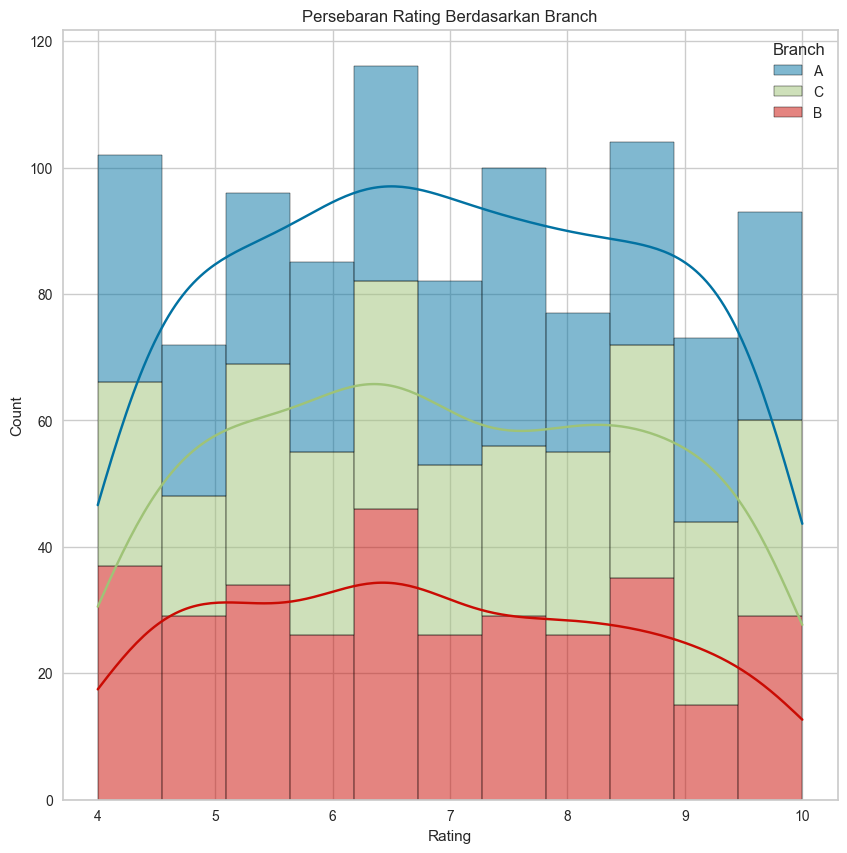

In [183]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='Rating', hue='Branch', multiple='stack', kde=True)
plt.title('Persebaran Rating Berdasarkan Branch')
plt.show()

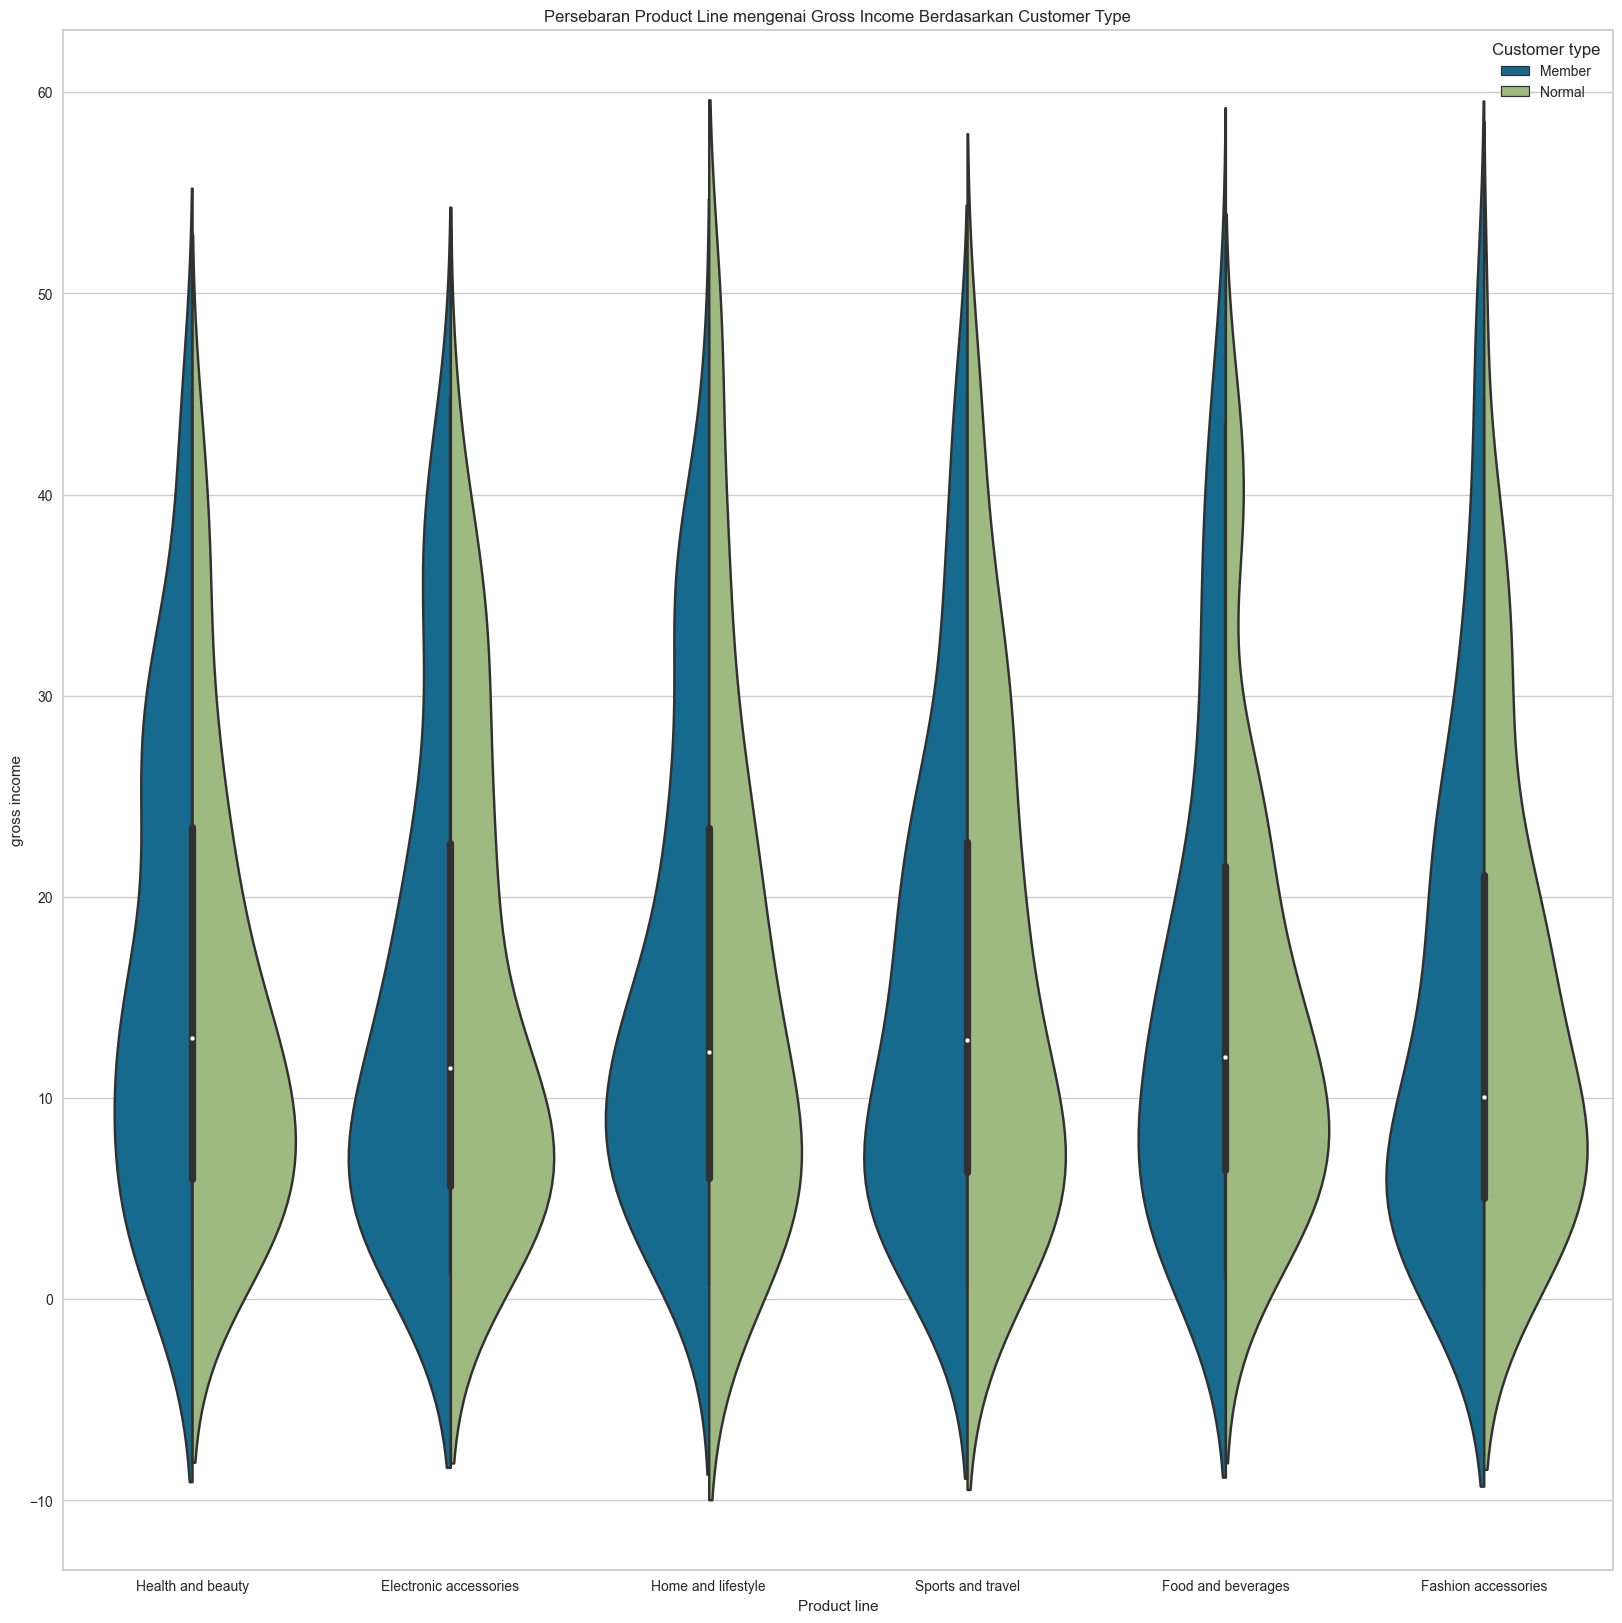

In [184]:
plt.figure(figsize=(20,20))
sns.violinplot(data=df, x='Product line', y='gross income', hue='Customer type', split=True)
plt.title('Persebaran Product Line mengenai Gross Income Berdasarkan Customer Type')
plt.show()

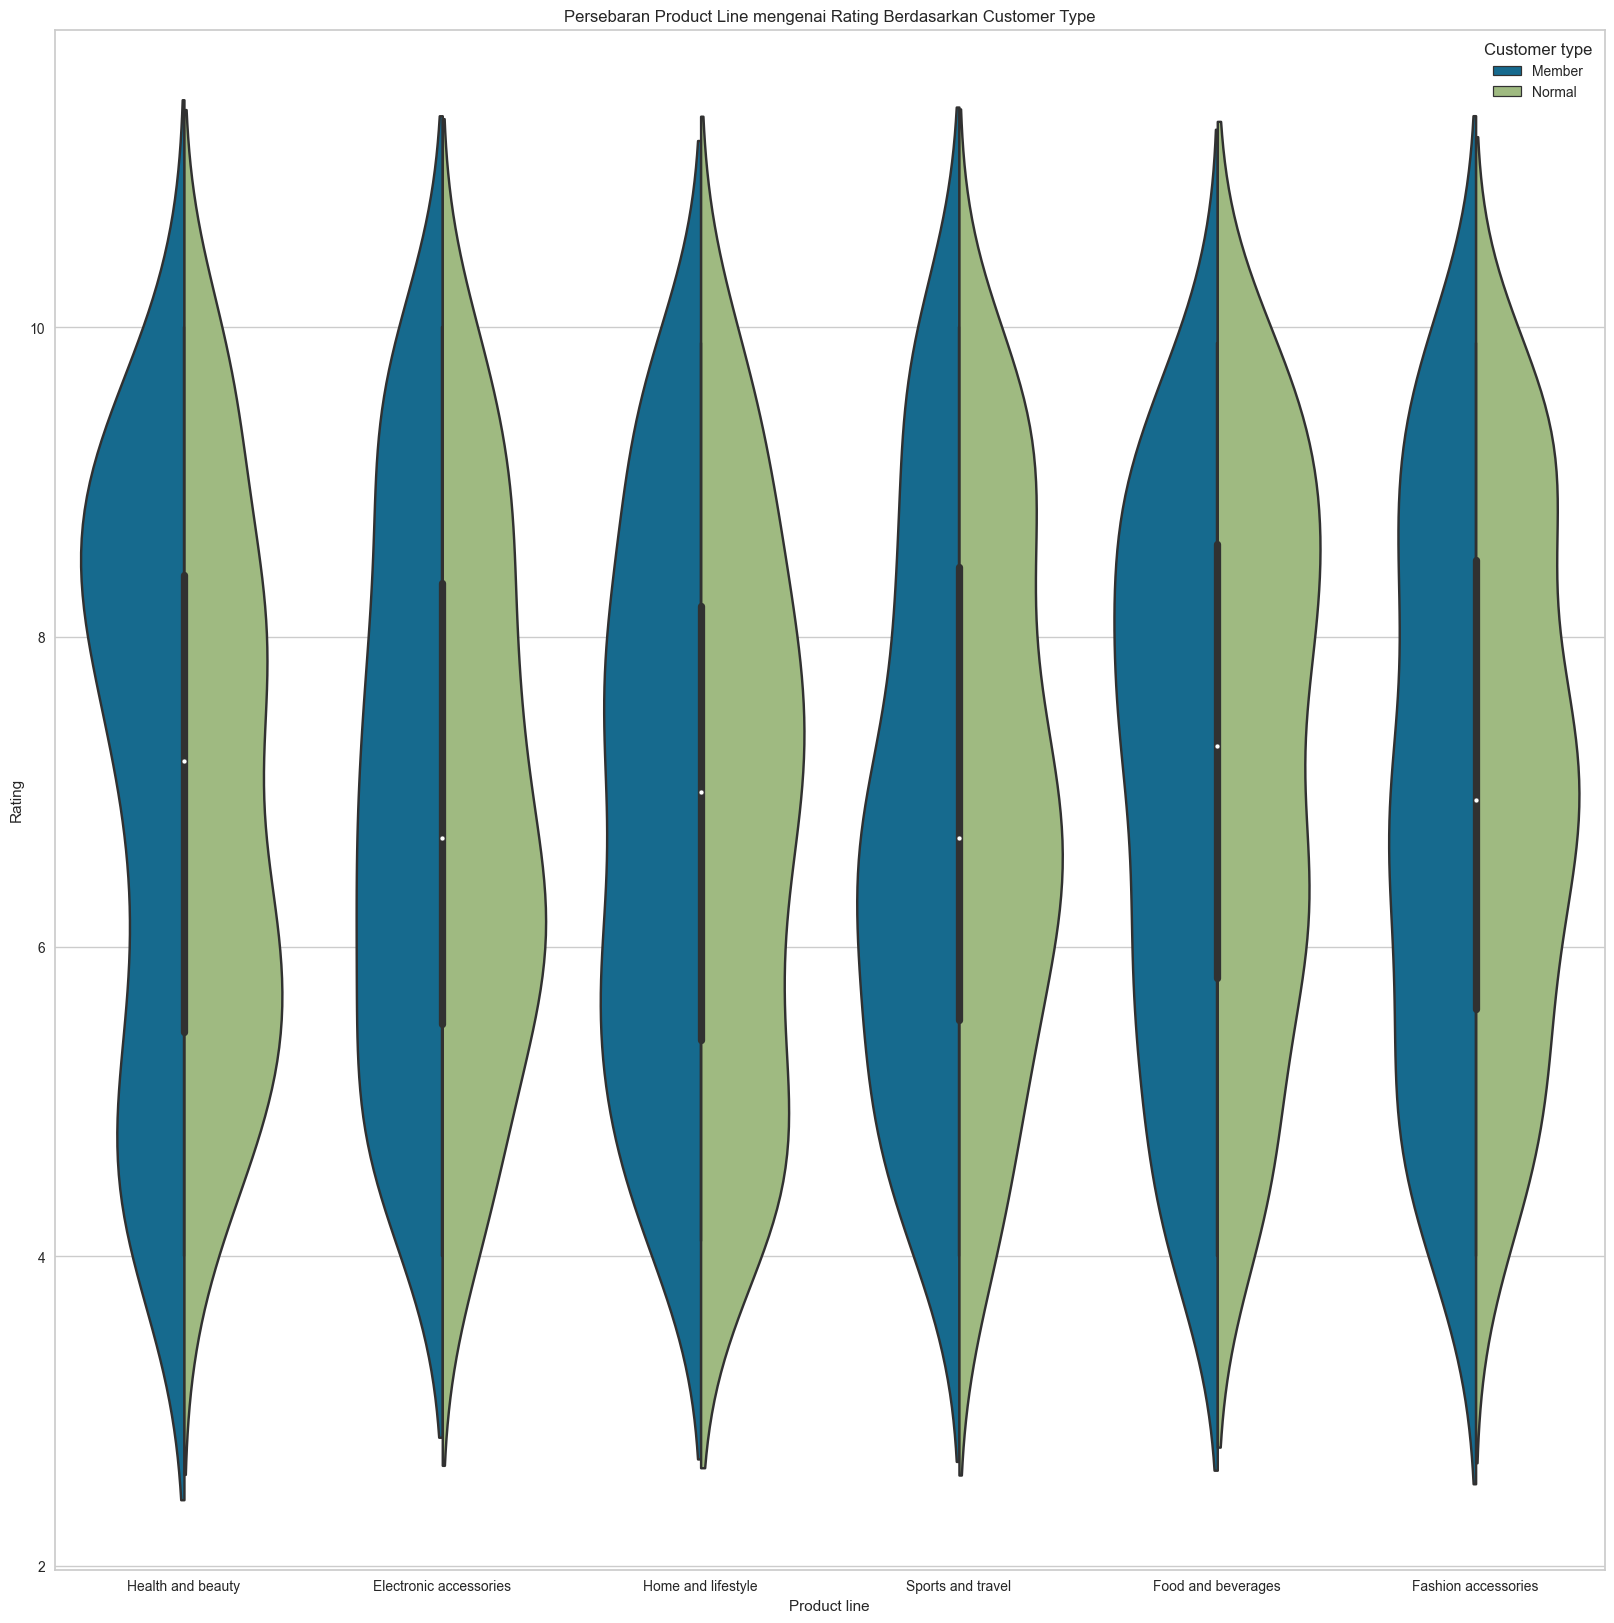

In [185]:
plt.figure(figsize=(20,20))
sns.violinplot(data=df, x='Product line', y='Rating', hue='Customer type', split=True)
plt.title('Persebaran Product Line mengenai Rating Berdasarkan Customer Type')
plt.show()

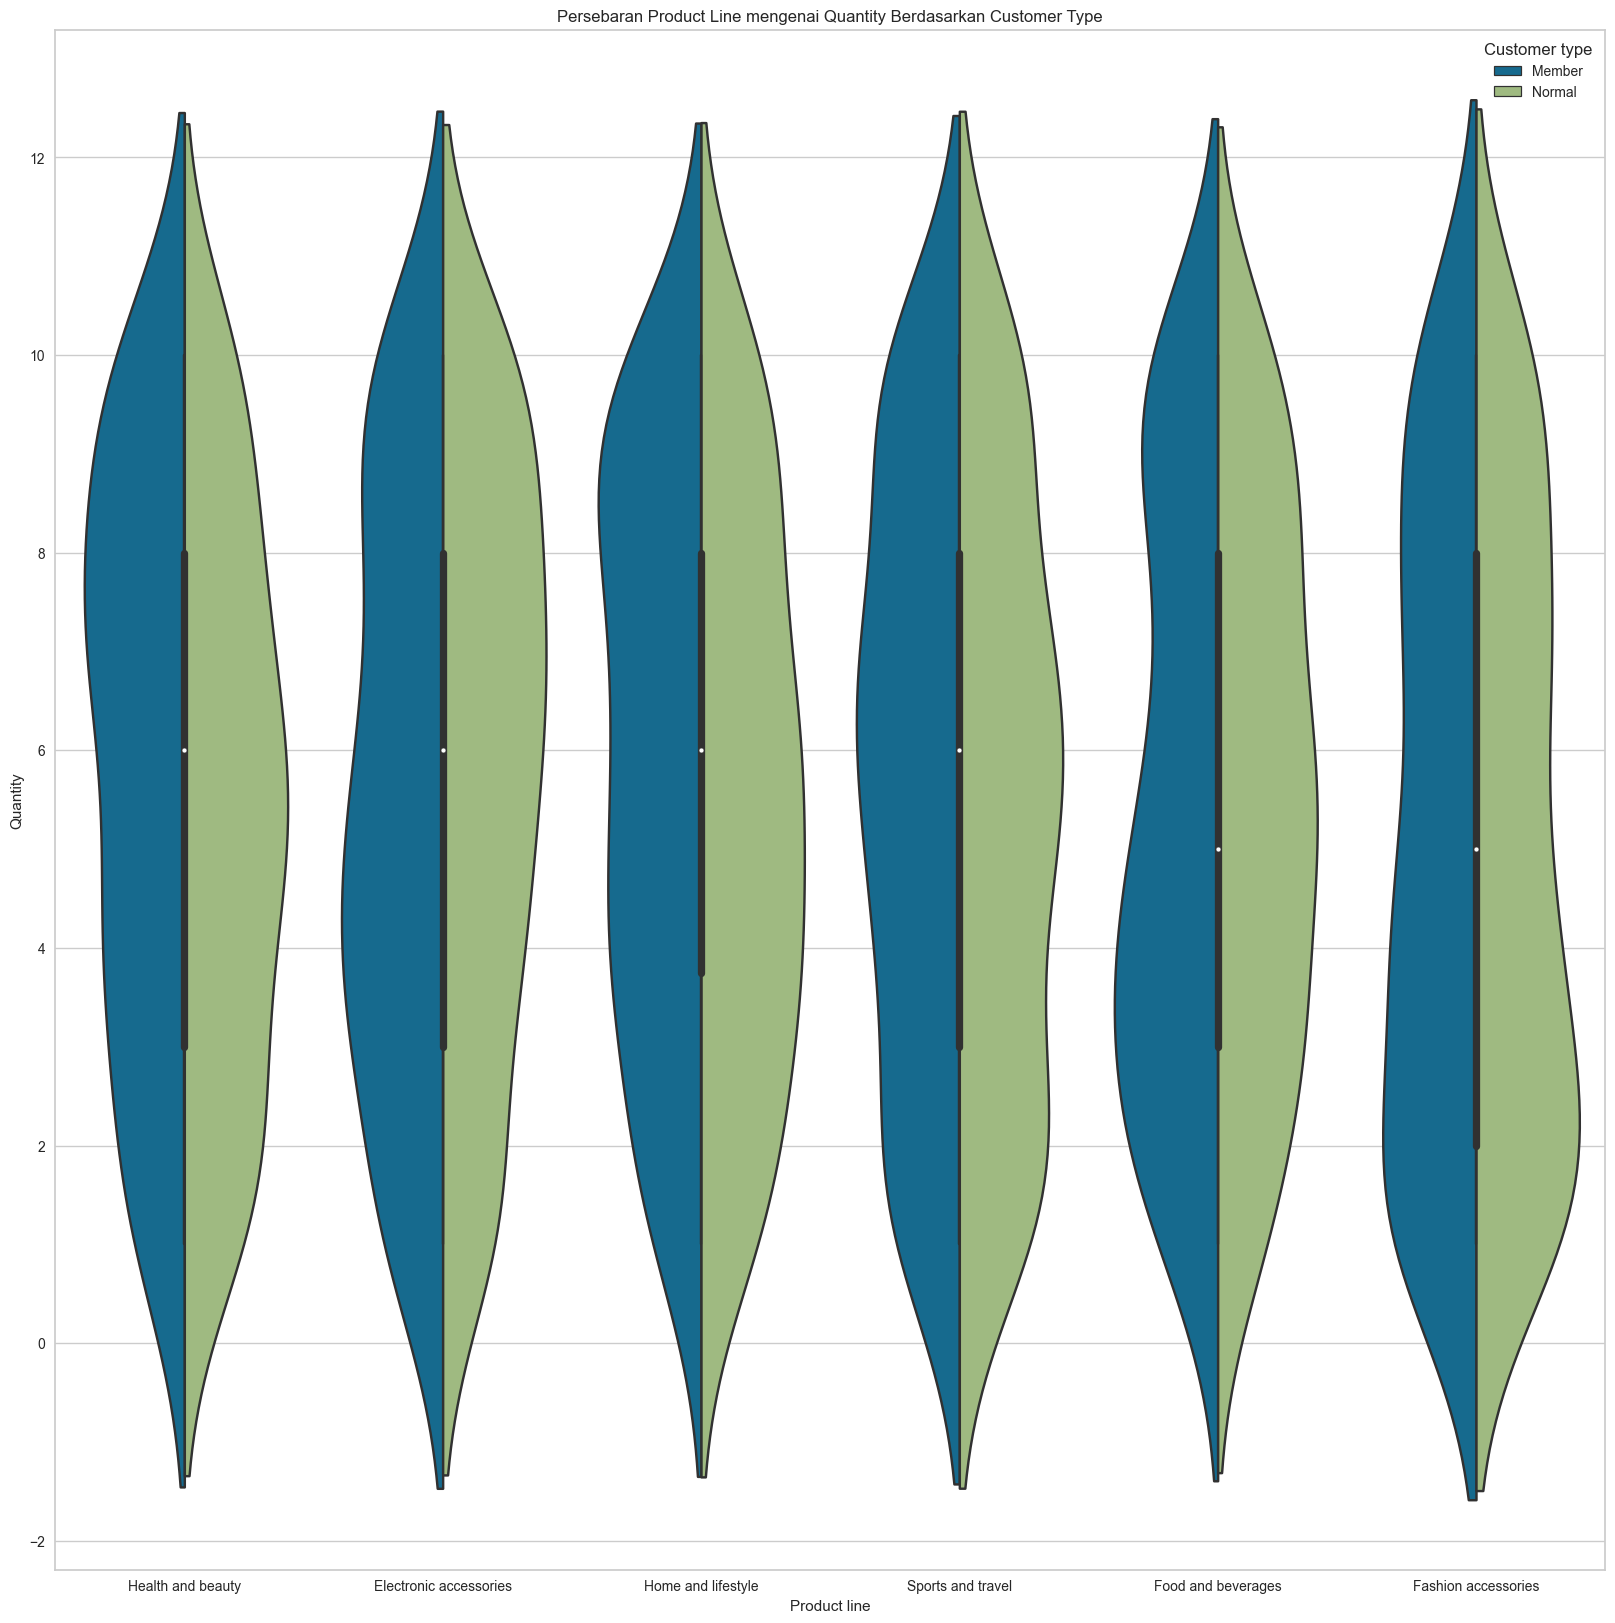

In [186]:
plt.figure(figsize=(20,20))
sns.violinplot(data=df, x='Product line', y='Quantity', hue='Customer type', split=True)
plt.title('Persebaran Product Line mengenai Quantity Berdasarkan Customer Type')
plt.show()